<a href="https://colab.research.google.com/github/Dennieeeee/KPMG-virtual-internship/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Sprocket Central Pty Ltd is a company that sells bikes. I am going to explore this dataset and identify customer trends and behavior.
- Step 1: Merging Data - Two datasets will be created:
  1. Old Customer : transations, demographic, and address datasets
  2. New Customer

- Step 2: Data Cleansing
- Step 3: Explore and Trim Outliers

### Exported the manipulated dataset into a new csv file called KPMG_new_data.csv

Goal: target customers between age 18 - 50 (born between 2002 to 1970)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime

In [2]:
url='https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/CustomerDemographic.csv'
df2 = pd.read_csv(url,encoding='ISO-8859-1')

In [3]:
transactions = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/Transactions.csv')
new_customer = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/NewCustomerList.csv')
demographic = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/CustomerDemographic.csv',encoding='ISO-8859-1')
address = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/CustomerAddress.csv')

In [4]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
new_customer.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,7/12/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.71875


In [6]:
demographic.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
address.head(1)

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 1: Merge Datasets

> Reference:
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/



Getting datasets ready, remove unnecesary columns

### Transactions Dataset

In [8]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [9]:
#dropping unncessary(Unamed) columns
transactions=transactions.drop(transactions.iloc[:,13:], axis=1)

In [10]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0


In [11]:
transactions.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                object
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost               object
product_first_sold_date    float64
dtype: object

In [12]:
#convert transaction_date to datetime
transactions['transaction_date']=pd.to_datetime(transactions['transaction_date'])

#### Checking Outliers

In [13]:
transactions.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



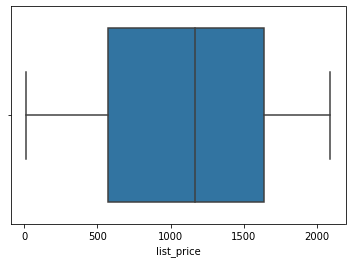

In [14]:
sns.boxplot(transactions['list_price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



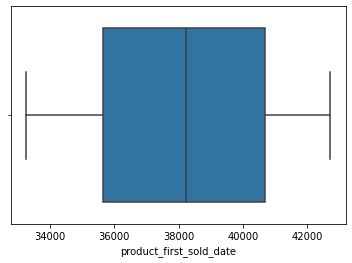

In [15]:
sns.boxplot(transactions['product_first_sold_date'])

### New Customer

In [16]:
new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [17]:
new_customer =new_customer.drop(new_customer.iloc[:,16:21], axis=1)

In [18]:
new_customer.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


#### Check Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



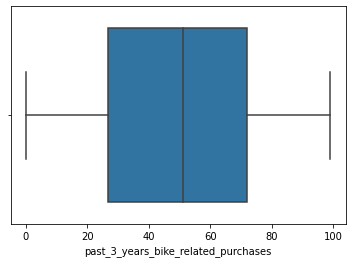

In [19]:
sns.boxplot(new_customer['past_3_years_bike_related_purchases'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



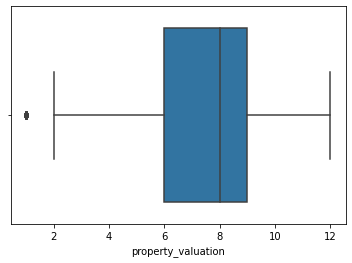

In [20]:
sns.boxplot(new_customer['property_valuation'])

### Demographic

In [21]:
demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [22]:
demographic = demographic.drop(demographic.iloc[:,13:], axis=1)

In [23]:
demographic.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0


In [24]:
demographic.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object

In [25]:
#convert DOB to datetime
demographic['DOB'] = pd.to_datetime(demographic['DOB'])

In [26]:
#We don't know what the default column is for, so we want to remove it
print(demographic['default'].tail(10))
demographic=demographic.drop(['default'],axis=1)

3990                                                   "'
3991    Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...
3992                                                   á 
3993                                            -1.00E+02
3994                                                   á 
3995                                            -1.00E+02
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, dtype: object


In [27]:
demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


### Customer Address

In [28]:
address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [29]:
address=address.drop(address.iloc[:,6:], axis=1)

In [30]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [31]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0


In [32]:
demographic['customer_id']

0          1
1          2
2          3
3          4
4          5
        ... 
3995    3996
3996    3997
3997    3998
3998    3999
3999    4000
Name: customer_id, Length: 4000, dtype: int64

Combining the Datasets

In [33]:
#### Join the Customer Demographic and Address
data=pd.merge(address,demographic,on=['customer_id'])

In [34]:
#join data and transactions
data = pd.merge(data,transactions,how='inner',on='customer_id')

In [35]:
data.head(1)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,94,86,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,$125.07,38482.0


In [36]:
new_customer.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,7/12/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875


In [37]:
new_customer.shape

(1000, 18)

In [38]:
old=['old']*19968
data['customer_type']=old

In [39]:
new=['new']*1000
new_customer['customer_type']=new

In [40]:
frames=[data,new_customer]
df = pd.concat(frames)

In [41]:
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'customer_type', 'Rank',
       'Value'],
      dtype='object')

In [42]:
df.shape

(20968, 32)

# Step 2: Data Cleansing
(Reference: https://machinelearningmastery.com/handle-missing-data-python/)

## Missing Values

In [43]:
df.head(1)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_type,Rank,Value
0,1.0,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,94.0,86.0,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,$125.07,38482.0,old,NaN,NaN


In [44]:
#drop Rank and Value in df
df=df.drop(df.iloc[:,-2:],axis=1)

In [45]:
df.isnull().sum()

customer_id                            1000
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
first_name                                0
last_name                               671
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     463
job_title                              2485
job_industry_category                  3387
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
transaction_id                         1000
product_id                             1000
transaction_date                       1000
online_order                           1359
order_status                           1000
brand                           

In [46]:
print('Entrees duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrees duplicates: 0


In [47]:
#remove nulls in customer_id
df=df.drop(df[df['customer_id'].isnull()].index)

Avis is missing a last name

In [48]:
lastname_null=df[df['last_name'].isnull()].head()
lastname_null['first_name'].value_counts()

Avis    5
Name: first_name, dtype: int64

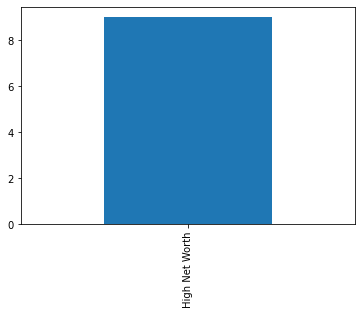

In [49]:
avis=df[df['first_name']=='Avis']
avis['wealth_segment'].value_counts().plot(kind='bar')

In [50]:
#drop Avis because his/her last name is missing, it could be very hard to find this person
df=df.drop(df[df['last_name'].isnull()].index)


job_industry_category

In [51]:
df=df.drop(df[df['job_industry_category'].isnull()].index)

Name

In [52]:
# Combine the first_name and last_name
df['name']=df['first_name']+' '+df['last_name']

Job Title

In [53]:
jobtitle_null=df[df['job_title'].isnull()]

In [54]:
jobtitle_null['name'].value_counts()

Frazer Searston        14
Brett McCalister       12
Burtie Scintsbury      11
Humfrey Boyse          11
Nickolas Guittet       11
                       ..
Cordelia Hawkeswood     2
Milli Hubbert           1
King Hoston             1
Cindie Naldrett         1
Hashim Hartwell         1
Name: name, Length: 315, dtype: int64

In [55]:
df[df['name']=='Frazer Searston']['job_title']

6170    NaN
6171    NaN
6172    NaN
6173    NaN
6174    NaN
6175    NaN
6176    NaN
6177    NaN
6178    NaN
6179    NaN
6180    NaN
6181    NaN
6182    NaN
6183    NaN
Name: job_title, dtype: object

In [56]:
df[df['name']=='Brett McCalister']['job_title'].nunique()

0

In [57]:
#drop rows with missing job_title
df=df.drop(df[df['job_title'].isnull()].index)

DOB

In [58]:
df[df['DOB'].isnull()]['name'].value_counts()

Harland Spilisy      11
Rinaldo Diggin       11
Pieter Gadesby       10
Conroy Healy         10
Marlie Teesdale      10
                     ..
Hermione Brereton     2
Casar Ritchley        2
Arabelle Rentelll     2
Darelle Ive           2
Ulrica Abelwhite      2
Name: name, Length: 65, dtype: int64

In [59]:
df[df['name']=='Rinaldo Diggin']['DOB']

17166    NaT
17167    NaT
17168    NaT
17169    NaT
17170    NaT
17171    NaT
17172    NaT
17173    NaT
17174    NaT
17175    NaT
17176    NaT
Name: DOB, dtype: object

In [60]:
df[df['name']=='Arabelle Rentelll']['DOB']

15155    NaT
15156    NaT
Name: DOB, dtype: object

In [61]:
#drop row with missng DOB
df=df.drop(df[df['DOB'].isnull()].index)

In [62]:
df['customer_type'].value_counts()

old    13249
Name: customer_type, dtype: int64

online order

In [63]:
df=df.drop(df[df['online_order'].isnull()].index)

In [64]:
df[df['product_line'].isnull()].index

Int64Index([ 1032,  1235,  1249,  1255,  1340,  1402,  1481,  1537,  1663,
             1711,
            ...
            18103, 18349, 18414, 18530, 18860, 19171, 19184, 19412, 19548,
            19775],
           dtype='int64', length=123)

In [65]:
df[df['product_class'].isnull()].index

Int64Index([ 1032,  1235,  1249,  1255,  1340,  1402,  1481,  1537,  1663,
             1711,
            ...
            18103, 18349, 18414, 18530, 18860, 19171, 19184, 19412, 19548,
            19775],
           dtype='int64', length=123)

In [66]:
#drop missing values in product line
df=df.drop(df[df['product_line'].isnull()].index)

In [67]:
df.isnull().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

## Correct discrete variables and ensure the data quality

In [68]:
df.head(1)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_type,name
1001,177.0,82520 Mifflin Drive,2333,NSW,Australia,5,Ondrea,Pablos,Female,25,1989-11-09 00:00:00,Professor,Financial Services,High Net Worth,N,No,4.0,1206.0,49.0,2017-07-07,False,Approved,Solex,Standard,medium,large,1061.56,$733.58,34170.0,old,Ondrea Pablos


state

In [69]:
df['state'].value_counts()

NSW         6779
VIC         2970
QLD         2836
Victoria     315
Name: state, dtype: int64

In [70]:
df['state'] = df['state'].replace('Victoria','VIC')

Gender

In [71]:
df['gender'].value_counts()

Female    6653
Male      6247
Name: gender, dtype: int64

In [72]:
df['country'].value_counts()

Australia    12900
Name: country, dtype: int64

In [73]:
df['job_title'].value_counts()

Social Worker                206
Nuclear Power Engineer       180
Chemical Engineer            180
Clinical Specialist          180
Internal Auditor             169
                            ... 
Research Assistant III         8
Developer IV                   8
Automation Specialist IV       7
Database Administrator II      5
Office Assistant II            3
Name: job_title, Length: 194, dtype: int64

In [74]:
df['job_industry_category'].value_counts()

Manufacturing         3138
Financial Services    3055
Health                2499
Retail                1365
Property              1025
IT                     553
Entertainment          544
Argiculture            449
Telecommunications     272
Name: job_industry_category, dtype: int64

In [75]:
df['wealth_segment'].value_counts()

Mass Customer        6360
High Net Worth       3341
Affluent Customer    3199
Name: wealth_segment, dtype: int64

In [76]:
df['owns_car'].value_counts()

Yes    6568
No     6332
Name: owns_car, dtype: int64

# Step 3: Explore and Trim Outliers

In [77]:
df.shape

(12900, 31)

In [78]:
df.head(1)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_type,name
1001,177.0,82520 Mifflin Drive,2333,NSW,Australia,5,Ondrea,Pablos,Female,25,1989-11-09 00:00:00,Professor,Financial Services,High Net Worth,N,No,4.0,1206.0,49.0,2017-07-07,False,Approved,Solex,Standard,medium,large,1061.56,$733.58,34170.0,old,Ondrea Pablos


In [79]:
df.describe()

,customer_id,postcode,property_valuation,past_3_years_bike_related_purchases,tenure,transaction_id,product_id,list_price,product_first_sold_date
count,12900.000000,12900.000000,12900.000000,12900.000000,12900.000000,12900.000000,12900.000000,12900.000000,12900.000000
mean,1807.322016,3001.869225,7.453023,49.288217,10.691085,10018.739302,45.621318,1111.620278,38222.621008
std,959.890995,855.343741,2.832652,28.618731,5.661074,5768.481924,30.480735,584.141597,2883.814514
min,177.000000,2000.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12.010000,33259.000000
25%,973.000000,2200.000000,6.000000,25.000000,6.000000,5051.500000,18.000000,586.450000,35667.000000
50%,1809.000000,2769.000000,8.000000,48.000000,11.000000,10019.500000,44.000000,1163.890000,38216.000000
75%,2629.000000,3793.000000,9.000000,73.000000,15.000000,15004.250000,72.000000,1635.300000,40779.000000
max,3497.000000,4883.000000,12.000000,99.000000,22.000000,20000.000000,100.000000,2091.470000,42710.000000


## Boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



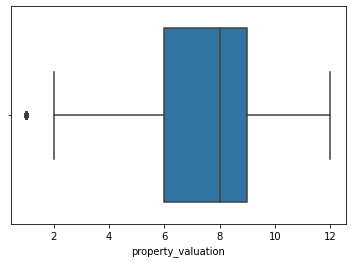

In [80]:
sns.boxplot(df['property_valuation'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



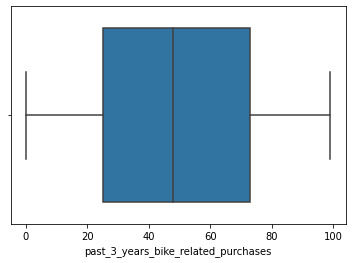

In [81]:
sns.boxplot(df['past_3_years_bike_related_purchases'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



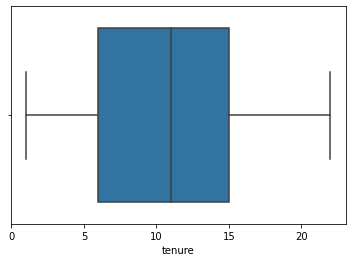

In [82]:
sns.boxplot(df['tenure'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



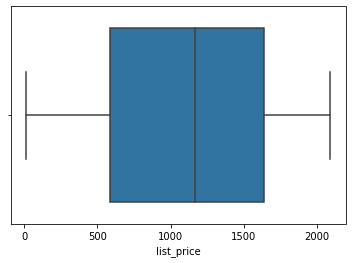

In [83]:
sns.boxplot(df['list_price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



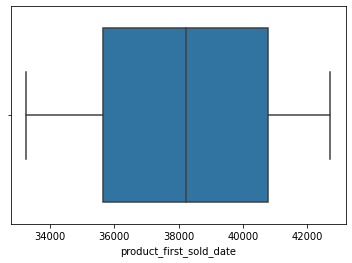

In [84]:
sns.boxplot(df['product_first_sold_date'])

## Scatter Plot

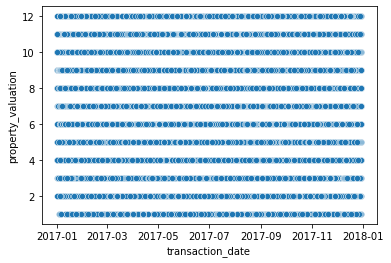

In [85]:
sns.scatterplot(x='transaction_date',y='property_valuation',data=df)

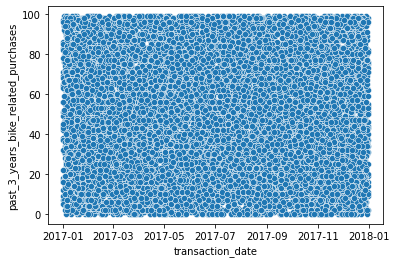

In [86]:
sns.scatterplot(x='transaction_date', y='past_3_years_bike_related_purchases', data=df)

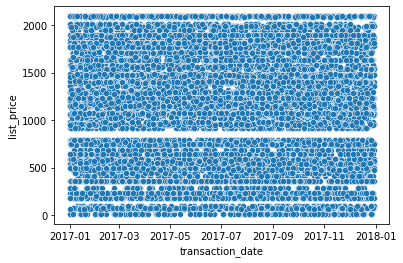

In [87]:
sns.scatterplot(x='transaction_date',y='list_price', data=df)

# A new dataset is created - new_data

In [88]:
df.to_csv('KPMG_new_data.csv',index=False)

# Conclusion

1. Removed unncessary columns (Unnamed columns) in each datasets
2. Merged transactions, demographic, and address datasets. Named it 'df'
3. Removed rows contain missing values in 'df'
4. Explored outliers in boxplots and scatter plots.
5. Exported the data - 'KPMG_new_data'

# IMPORTANT:
No outliers detected so far.

See the next python file for EDA, descriptive analysis, and more.